#2
Accuracy explains how often the model makes correct predictions in general. If a test has a 95% accuracy, it means it can correctly identify 95 cases out of every 100 cases.For example, during the covid-19 pandemic period, if the model is one sided dominated (all negatives), it might be a sign that the model might need an update. 
Sensitivity is how sensitive the model is, or in other words, how likely is the model identifing correctly. This can play a significant part especially when it is critical to identify wrongly. For example, delaying end-stage patients can endanger the patients. 
Specificity measures how well the modeal can identify people who do not have the condition. This can stop unnecessary actions or costs. For example, this can prevent people from being told that they have diseases when they actually don't have and lead to unnecessary treatments. 
Precision is the quality of positive predictions. This step is like, out of all the positives identified, which ones are actually positive? This can also prevent unnecessary actions, costs, and stress. 

In [7]:
#4
import pandas as pd
from sklearn.model_selection import train_test_split

data = {
    'List Price': [10, 20, 15, 30, 25, 40, 50, 35, 45, 60],
    'Hard_or_Paper': ['H', 'P', 'P', 'H', 'H', 'P', 'P', 'H', 'P', 'H']
}
ab_reduced_noNaN = pd.DataFrame(data)

ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

print(f"Training set size: {len(ab_reduced_noNaN_train)} observations")
print(f"Testing set size: {len(ab_reduced_noNaN_test)} observations")

Training set size: 8 observations
Testing set size: 2 observations


The training set size has 8 observations (80% of the data), and the testing set size has 2 observations (20% of the data). 

Accuracy: 1.00


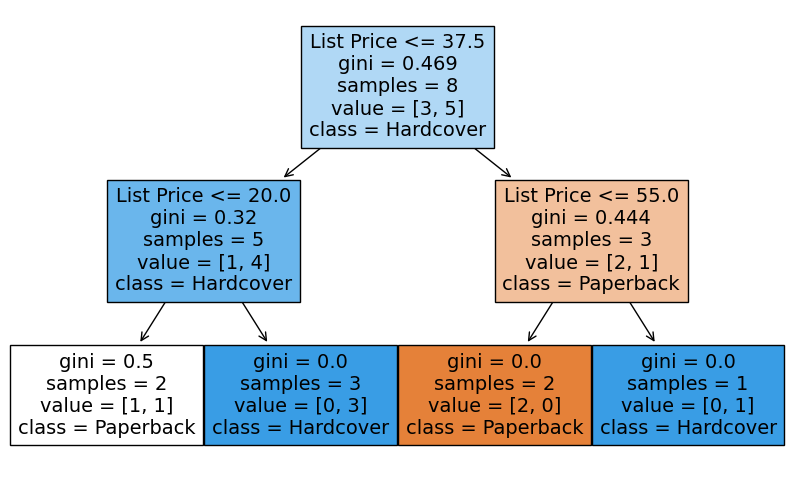

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optional: Visualize the tree (if desired and appropriate)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


Using tree.plot_tree(clf), List Price splits into intervals to predict if a book if hardcover or paperback. Each node represents a threshold (for example List Price <= 20.0), which leads to a prediction based on whether it's hardcover class or paperback class within the split data at that node. 

Class distribution in y_test:
H
False    2
Name: count, dtype: int64


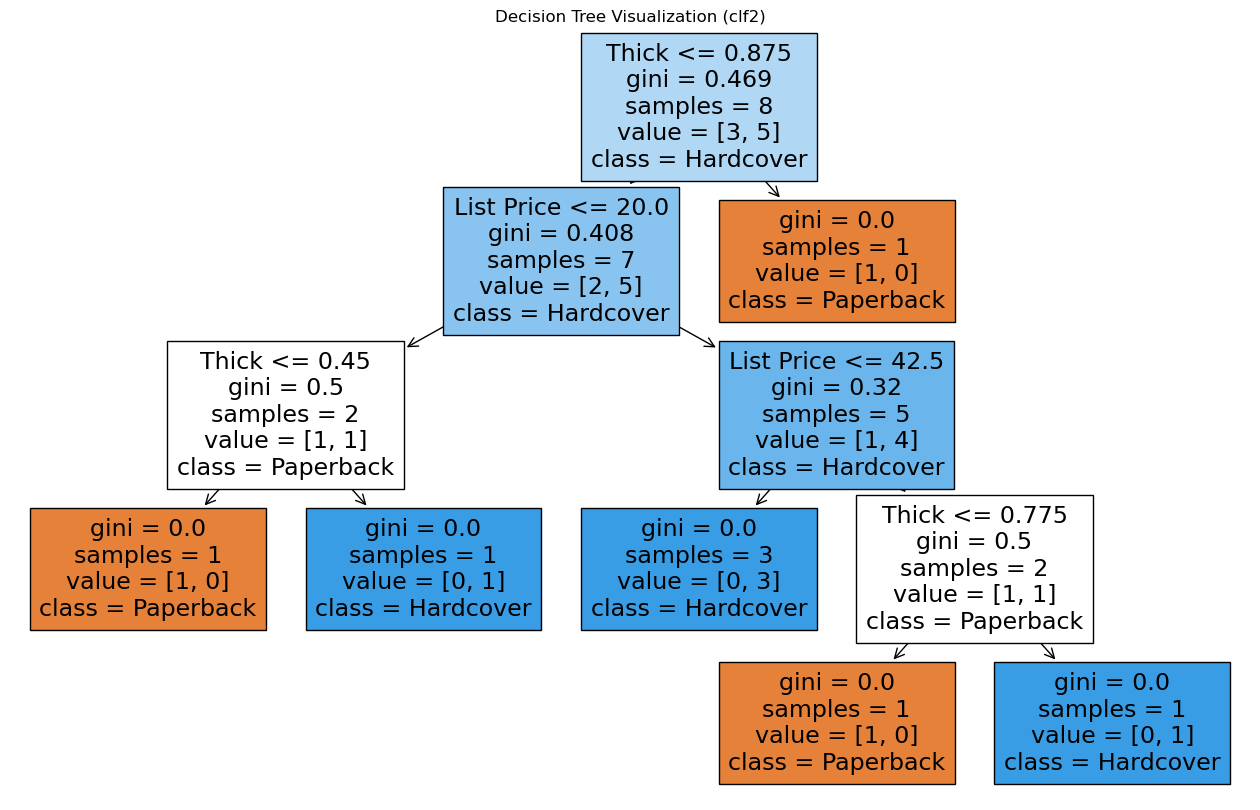

Confusion Matrix for clf (List Price only):


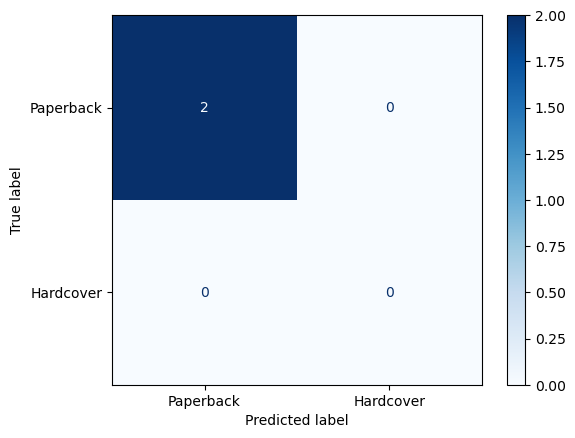

Confusion Matrix for clf2 (NumPages, Thick, List Price):


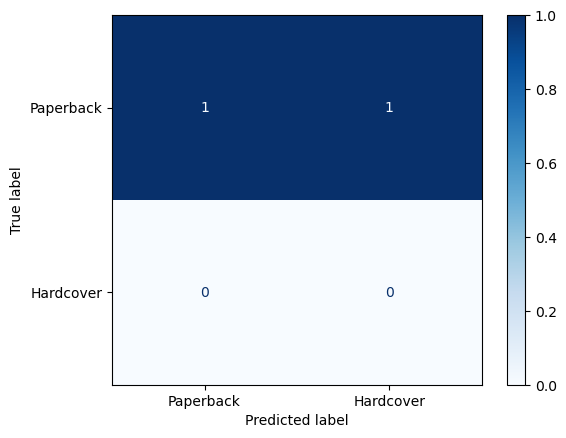

Metrics for clf (List Price only):
Sensitivity: 0.00, Specificity: 1.00, Accuracy: 1.00

Metrics for clf2 (NumPages, Thick, List Price):
Sensitivity: 0.00, Specificity: 0.50, Accuracy: 0.50


In [14]:
#6
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure all required columns exist in the dataset
required_columns = ['NumPages', 'Thick', 'List Price']
if not all(col in ab_reduced_noNaN.columns for col in required_columns):
    raise ValueError(f"The dataset is missing required columns: {required_columns}")

# Prepare data for the first and second models
X_full = ab_reduced_noNaN[required_columns]
y_full = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Train the first model (clf) using only "List Price"
X1_train = X_train[['List Price']]
X1_test = X_test[['List Price']]

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X1_train, y_train)

# Train the second model (clf2) using "NumPages", "Thick", and "List Price"
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Make predictions for both models
y_pred_clf = clf.predict(X1_test)
y_pred_clf2 = clf2.predict(X_test)

# Check class distribution
print("Class distribution in y_test:")
print(y_test.value_counts())

# Evaluate the first model (clf)
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf, labels=[0, 1])
sensitivity_clf = recall_score(y_test, y_pred_clf, pos_label=1, zero_division=0)
specificity_clf = conf_matrix_clf[0, 0] / (conf_matrix_clf[0, 0] + conf_matrix_clf[0, 1]) if (conf_matrix_clf[0, 0] + conf_matrix_clf[0, 1]) > 0 else np.nan
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Evaluate the second model (clf2)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2, labels=[0, 1])
sensitivity_clf2 = recall_score(y_test, y_pred_clf2, pos_label=1, zero_division=0)
specificity_clf2 = conf_matrix_clf2[0, 0] / (conf_matrix_clf2[0, 0] + conf_matrix_clf2[0, 1]) if (conf_matrix_clf2[0, 0] + conf_matrix_clf2[0, 1]) > 0 else np.nan
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Visualize clf2
plt.figure(figsize=(16, 10))
plot_tree(clf2, feature_names=required_columns, class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree Visualization (clf2)")
plt.show()

# Display confusion matrices
disp1 = ConfusionMatrixDisplay(conf_matrix_clf, display_labels=['Paperback', 'Hardcover'])
disp2 = ConfusionMatrixDisplay(conf_matrix_clf2, display_labels=['Paperback', 'Hardcover'])

print("Confusion Matrix for clf (List Price only):")
disp1.plot(cmap="Blues")
plt.show()

print("Confusion Matrix for clf2 (NumPages, Thick, List Price):")
disp2.plot(cmap="Blues")
plt.show()

# Report metrics
print("Metrics for clf (List Price only):")
print(f"Sensitivity: {sensitivity_clf:.2f}, Specificity: {specificity_clf:.2f}, Accuracy: {accuracy_clf:.2f}")

print("\nMetrics for clf2 (NumPages, Thick, List Price):")
print(f"Sensitivity: {sensitivity_clf2:.2f}, Specificity: {specificity_clf2:.2f}, Accuracy: {accuracy_clf2:.2f}")


The models are not good. The sensitivity is zero which means it is not useful for evaluating the models' performance. For clf, the model reached an accuracy and specificity of 1.00, but these are inflated becuse the model only predicts negatives. For clf2, the accuracy and specificity is 0.5, showing that the model has a imbalanced test set. I'm stuck on this question.

#7
In the first matrix, clf predicts using the List Price variable only, which limits the model's ability to capture complex patterns within the data. In the second matrix, clf predicts using also NumPages and Thicl, which can let it consider more features and predictions. The matrices are better for evaluating generalization because they can reflect the models' performance on unseen data. 

link to chatlog history: https://chatgpt.com/c/673fefbb-e35c-8007-adcb-08c11b899c24
SummaryThis chat focused on training and evaluating two `DecisionTreeClassifier` models using scikit-learn: one (`clf`) with `List Price` as the sole feature and another (`clf2`) with `NumPages`, `Thick`, and `List Price`. Initially, issues arose due to missing columns in the test set and a class imbalance, where the test set contained only one class (`H: False`). This led to undefined sensitivity and skewed metrics. Solutions included regenerating the train-test split with the necessary columns and implementing stratified sampling to ensure both classes were represented in the test set. Metrics for the models showed that class imbalance severely impacted sensitivity and specificity. The final recommendation was to use stratified sampling, cross-validation, or oversampling techniques like SMOTE to achieve a balanced and fair evaluation.